<a href="https://colab.research.google.com/github/hyndhavamahesh345/Task-6-KNN-Classification/blob/main/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [20]:
# Load the dataset
df = pd.read_csv("Iris.csv")

# Drop the ID column
df = df.drop("Id", axis=1)

# Encode the target labels
df['Species'] = df['Species'].astype('category').cat.codes

In [9]:
# Split features and labels
X = df.drop('Species', axis=1)
y = df['Species']

In [10]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
# Try different K values
k_range = range(1, 16)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

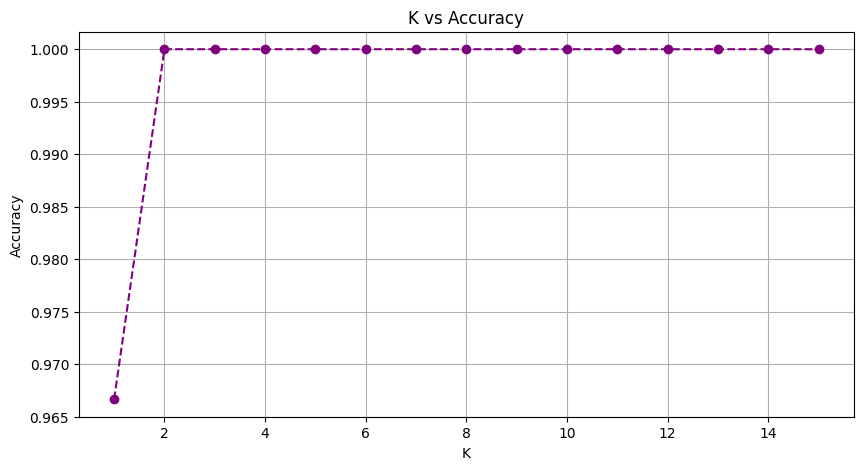

In [14]:
# Plot K vs Accuracy
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o', linestyle='--', color='purple')
plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [15]:
# Best K
best_k = k_range[np.argmax(accuracies)]
print(f"✅ Best K = {best_k} with Accuracy = {max(accuracies):.2f}")

✅ Best K = 2 with Accuracy = 1.00


In [26]:
# Retrain model with best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)





📊 Confusion Matrix:


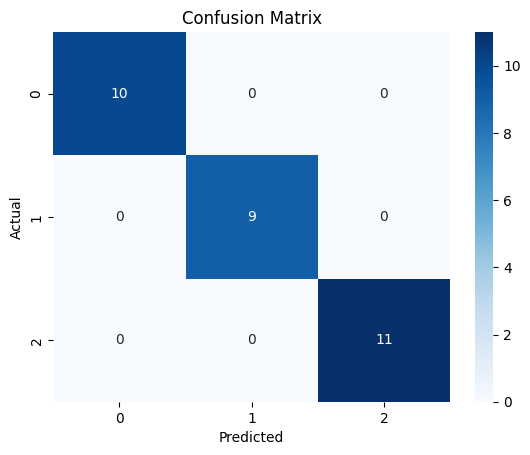


📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [23]:
# Evaluation
print("\n📊 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred_best))

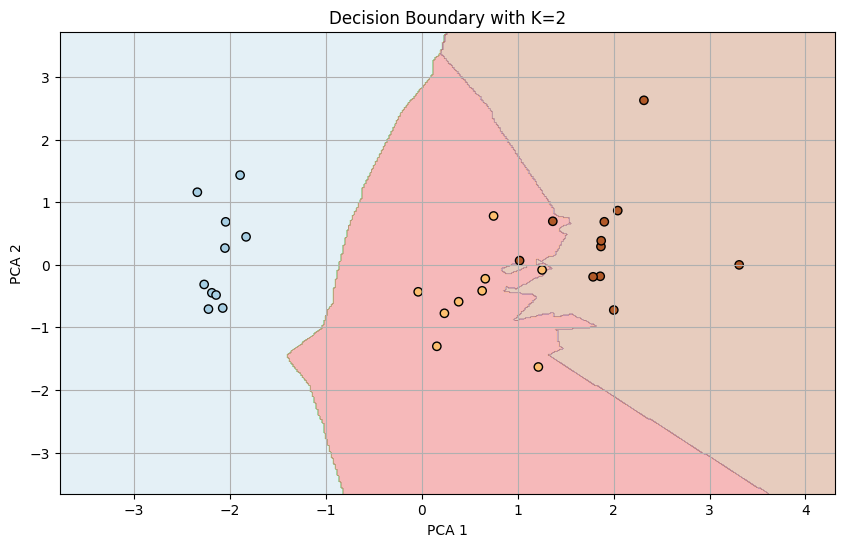

In [24]:
# Visualize decision boundaries (2D PCA)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_pca, y_train_pca)

# Mesh grid
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pca, edgecolor='k', cmap=plt.cm.Paired)
plt.title(f"Decision Boundary with K={best_k}")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()
